In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_chords = pd.read_csv("../data/song_data_by_chord.csv")
df_chords.head()

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year,Roman Numeral
0,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,0,0,D9,1941,NaN
1,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,1,1,Fm6,1941,NaN
2,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,2,2,D9,1941,NaN
3,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,3,3,Fm6,1941,NaN
4,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,4,4,C,1941,NaN


In [3]:
df_songs = pd.read_csv("../data/song_data.csv")
df_songs.drop(columns=["Sections"], inplace=True)
df_songs.head()

,Title,Composer,Rhythm,TimeSignature,Key,Year
0,9.20 Special,Earl Warren,Medium Swing,4/4,NaN,1941
1,26-2,John Coltrane,Medium Up Swing,4/4,F,1947
2,52nd Street Theme,Thelonious Monk,Up Tempo Swing,4/4,NaN,1947
3,500 Miles High,Chick Corea,Bossa Nova,4/4,Emin,1972
4,502 Blues,Jimmy Rowles,Waltz,3/4,Amin,1959


In [4]:
#Now that both dataframes are loaded, we will first explore the songs dataframe
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1382 non-null   object
 1   Composer       1382 non-null   object
 2   Rhythm         1382 non-null   object
 3   TimeSignature  1371 non-null   object
 4   Key            1149 non-null   object
 5   Year           1382 non-null   object
dtypes: object(6)
memory usage: 64.9+ KB


In [5]:
df_songs.describe()

,Title,Composer,Rhythm,TimeSignature,Key,Year
count,1382,1382,1382,1371,1149,1382
unique,1382,544,18,5,23,77
top,9.20 Special,Thelonious Monk,Medium Swing,4/4,F,na
freq,1,48,506,1265,254,74


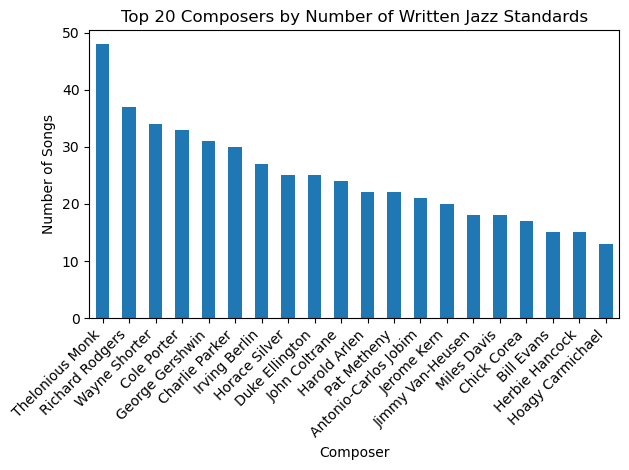

In [6]:
# We see there are 1382 total songs spanning 77 different years. They include 544 unique composers, 
# 18 unique rhythm types, 5 time sgnatures, and 23 keys. 

# Let's see which composers wrote the most jazz standards.

top_composers = df_songs["Composer"].value_counts().head(20)

# Plot
plt.figure()
top_composers.plot(kind="bar")
plt.xlabel("Composer")
plt.ylabel("Number of Songs")
plt.title("Top 20 Composers by Number of Written Jazz Standards")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

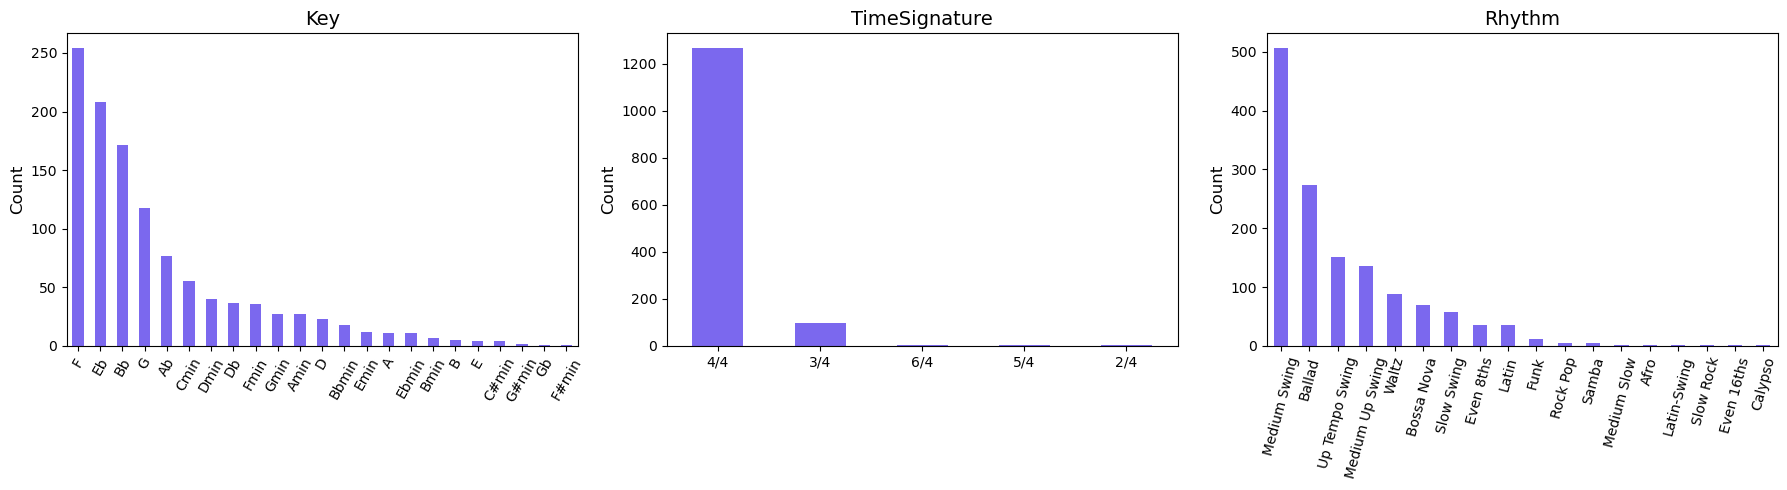

In [7]:
#Very cool. Thelonius Monk wrote almost 50 jazz standards! Let's explore our other song features.

columns = ["Key", "TimeSignature", "Rhythm"]
rotations = [60, 0, 75]  

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, rot in zip(axes, columns, rotations):
    counts = df_songs[col].value_counts().sort_values(ascending=False)
    counts.plot(kind="bar", ax=ax, color="mediumslateblue")
    
    ax.set_title(col, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis="x", rotation=rot)

plt.tight_layout()
plt.show()

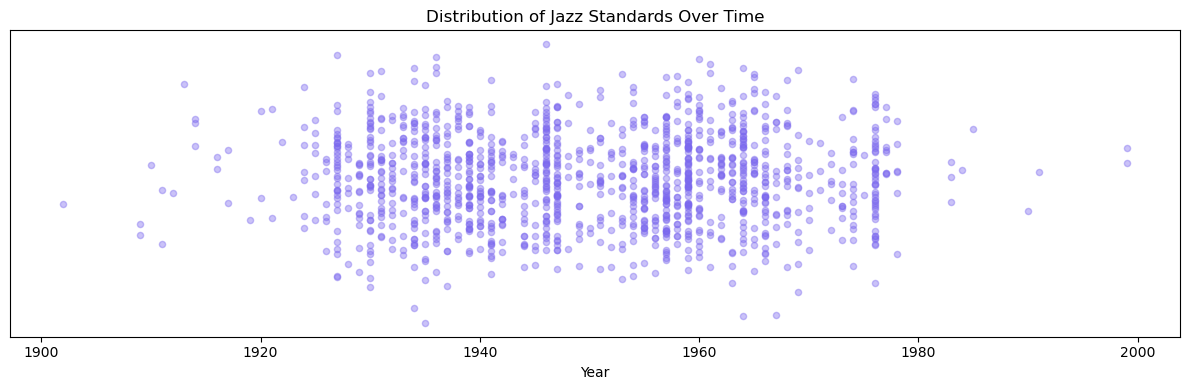

In [8]:
# The most common keys are F, Eb, and Bb — the three easiest keys for horn players. 
# F major is also convenient for pianists, since it contains only one flat.
# 4/4 and 3/4 account for the vast majority of time signatures, while Medium Swing and Ballad dominate the rhythm categories.

# Now let's looks at when these standards were written

df_songs["Year"] = pd.to_numeric(df_songs["Year"], errors="coerce")

# Drop any rows where Year is NaN or < 1900 (outlier)
df_songs_clean = df_songs.dropna(subset=["Year"])
df_songs_clean = df_songs_clean[df_songs_clean["Year"] >= 1900]

y_jitter = np.random.normal(0, 0.3, len(df_songs_clean))

plt.figure(figsize=(12, 4))
plt.scatter(df_songs_clean["Year"], y_jitter, alpha=0.4, s=20, color="mediumslateblue")
plt.xlabel("Year")
plt.title("Distribution of Jazz Standards Over Time")
plt.yticks([])  # hide y-axis
plt.tight_layout()
plt.show()

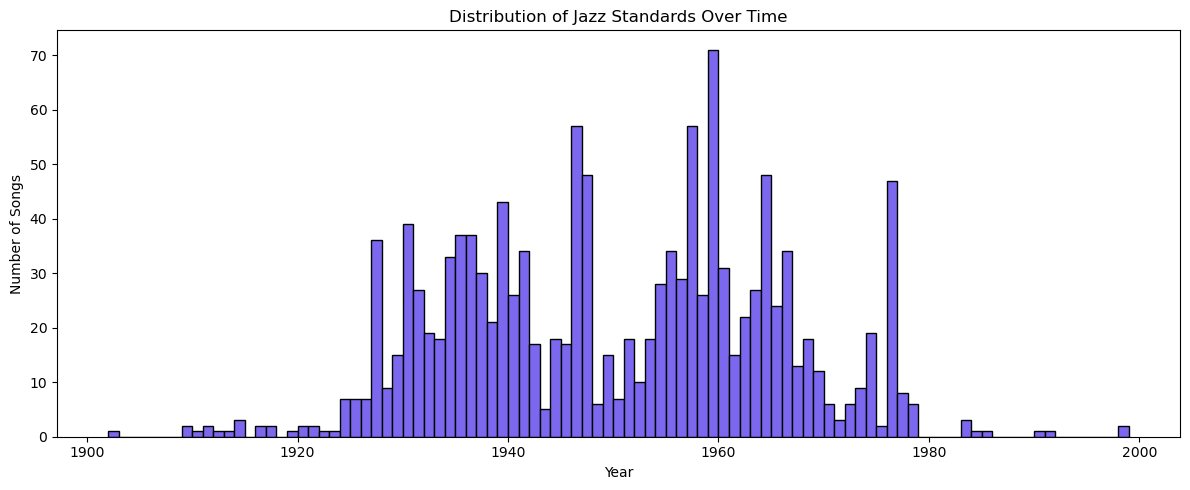

In [9]:
# Let's see that as a histogram
plt.figure(figsize=(12, 5))
plt.hist(df_songs_clean["Year"], bins=range(int(df_songs_clean["Year"].min()), 
                                             int(df_songs_clean["Year"].max()) + 1),
         color="mediumslateblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Distribution of Jazz Standards Over Time")
plt.tight_layout()
plt.show()

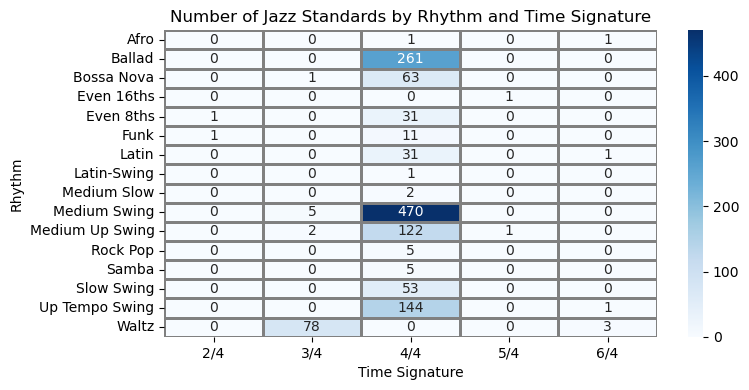

In [10]:
# These standards span the early to late 20th century, peaking in the 1950s and 1960s.
# Now let's explore the relationship between rythm and time signature.
# Create a pivot table: count of songs for each Rhythm-TimeSignature combination
pivot_ts = df_songs_clean.pivot_table(index="Rhythm", columns="TimeSignature", 
                                      aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_ts, annot=True, fmt="d", cmap="Blues",
            linewidths=0.8, linecolor='gray')  # add grid lines
plt.title("Number of Jazz Standards by Rhythm and Time Signature")
plt.xlabel("Time Signature")
plt.ylabel("Rhythm")
plt.tight_layout()
plt.show()

In [11]:
# Most rhythms are predominantly in 4/4, except for Waltz, which appears only in 3/4 and 6/4, as expected. 
# Most other rhythms are in 4/4. 
# Only two songs are in the unusual 5/4 time signature. Some Swing songs appear in 3/4 and 6/4.

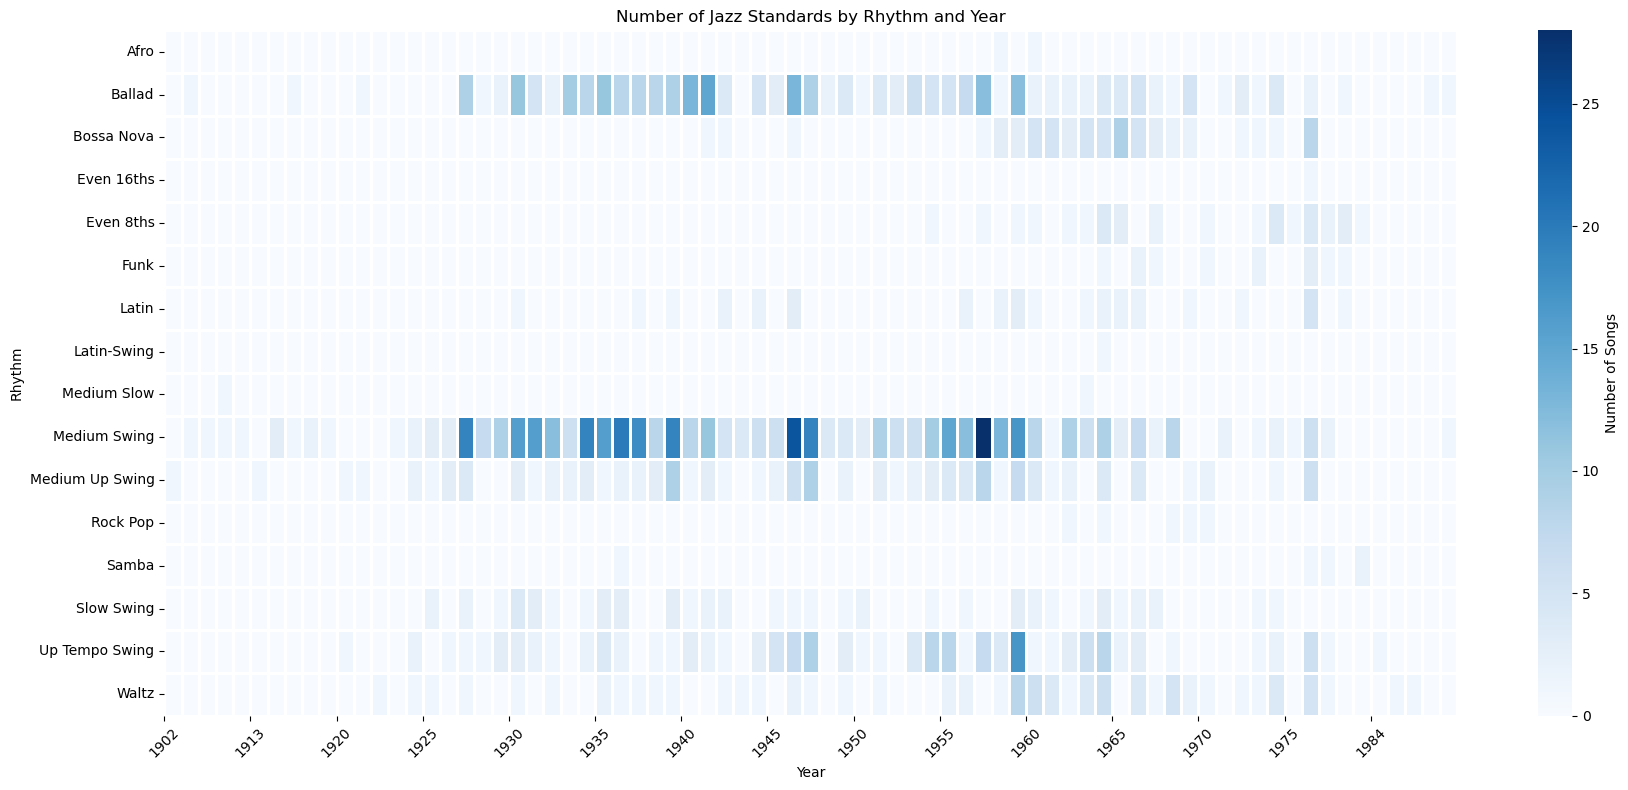

In [12]:
#Now let's take a look at the rhythm types by year

df_songs_clean["Year"] = df_songs_clean["Year"].astype(int)

# Pivot table: Rhythm × Year
pivot_year = df_songs_clean.pivot_table(index="Rhythm", columns="Year", 
                                        aggfunc="size", fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(
    pivot_year,
    cmap="Blues",
    cbar_kws={'label': 'Number of Songs'},
    linewidths=0.8,    # thickness of the outlines
    linecolor='white'  # color of the outlines
)

# Spread out x-axis labels for readability
years = pivot_year.columns
plt.xticks(ticks=range(0, len(years), 5), labels=years[::5], rotation=45)

plt.title("Number of Jazz Standards by Rhythm and Year")
plt.xlabel("Year")
plt.ylabel("Rhythm")
plt.tight_layout()
plt.show()

In [13]:
# Some rhythms, like Ballad, Swing, and Waltz, have existed throughout the history of jazz.
# Other rhythms, such as Rock/Pop and Funk, did not appear until the 1960s.
# Bossa Nova became popular in the late 1950s, with key figures like Antônio Carlos Jobim and João Gilberto.

# Now it is time to explore our chords dataframe
df_chords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56025 entries, 0 to 56024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           56025 non-null  object
 1   Composer        56025 non-null  object
 2   Key             46064 non-null  object
 3   Rhythm          56025 non-null  object
 4   Time Signature  55501 non-null  object
 5   Section         50097 non-null  object
 6   Measure         56025 non-null  int64 
 7   Chord Index     56025 non-null  int64 
 8   Chord           55272 non-null  object
 9   Year            56025 non-null  object
 10  Roman Numeral   30838 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.7+ MB


In [14]:
df_chords.describe(include='all')

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year,Roman Numeral
count,56025,56025,46064,56025,55501,50097,56025.000000,56025.000000,55272,56025,30838
unique,1382,544,23,18,5,6,NaN,NaN,1377,77,561
top,Lush Life,Richard Rodgers,F,Medium Swing,4/4,A,NaN,NaN,C7,na,ii7
freq,101,1817,10379,20431,51572,29121,NaN,NaN,2549,2771,3724
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.343704,22.198162,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.550190,15.423402,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,20.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,32.000000,NaN,NaN,NaN


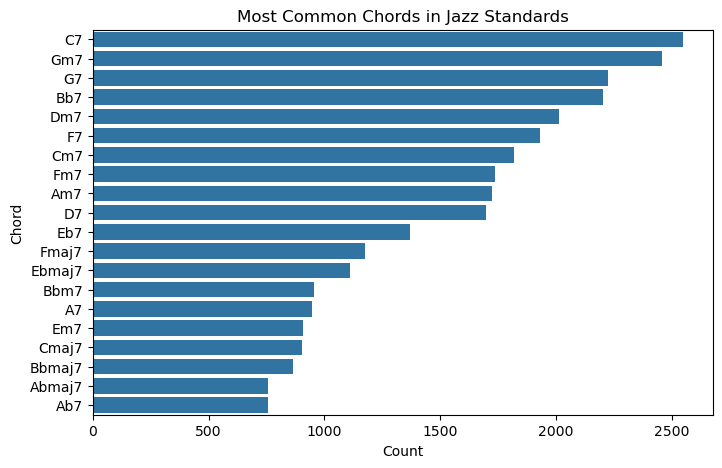

In [15]:
# There are 1377 unique chords across all songs! That's a lot and shows the complexity of jazz. 
# Only 30,838 of the 55,272 total chords have matched Roman numerals, due to limitations in the music21 Roman numeral analysis.
# Let's explore some features

top_chords = (
    df_chords["Chord"]
    .value_counts()
    .head(20)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_chords.values, y=top_chords.index)
plt.title("Most Common Chords in Jazz Standards")
plt.xlabel("Count")
plt.ylabel("Chord")
plt.show()

/var/folders/r0/mxnnbvln7wl__9w60hwgw01c0000gn/T/ipykernel_4505/1731814437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roman_counts_top.values, y=roman_counts_top.index, palette="viridis")


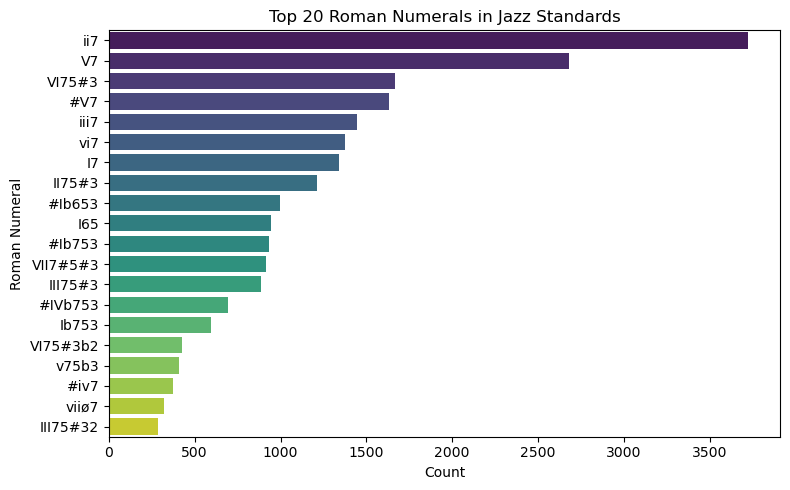

In [16]:
# C7, Gm7, and G7 are the most common chords in our standards.
# Let's do the same for roman numerals
top_n = 20
roman_counts_top = df_chords["Roman Numeral"].value_counts().head(top_n)

plt.figure(figsize=(8,5))
sns.barplot(x=roman_counts_top.values, y=roman_counts_top.index, palette="viridis")
plt.title(f"Top {top_n} Roman Numerals in Jazz Standards")
plt.xlabel("Count")
plt.ylabel("Roman Numeral")
plt.tight_layout() 
plt.show()

In [17]:
# ii7 and V7 are the two most common, again reflecting the central role of the 2-5-1 progression.
# Let's add some new columns that could be useful. We will start with a column for root and root pitch class

# From now on our chords dataframe will be df
df = df_chords

NOTE_MAP = {
    "C": 0, "C#": 1, "Db": 1,
    "D": 2, "D#": 3, "Eb": 3,
    "E": 4,
    "F": 5, "F#": 6, "Gb": 6,
    "G": 7, "G#": 8, "Ab": 8,
    "A": 9, "A#": 10, "Bb": 10,
    "B": 11
}

def extract_root(chord):
    if pd.isna(chord):
        return np.nan
    if len(chord) > 1 and chord[1] in ["b", "#"]:
        return chord[:2]
    return chord[0]

df["Root"] = df["Chord"].apply(extract_root)
df["Root_pc"] = df["Root"].map(NOTE_MAP)

In [18]:
df[['Chord', 'Root', 'Root_pc']].head()

,Chord,Root,Root_pc
0,D9,D,2.0
1,Fm6,F,5.0
2,D9,D,2.0
3,Fm6,F,5.0
4,C,C,0.0


In [19]:
# Now we will add a column for chord type (ignoring extensions past 7)

df["Chord_clean"] = df["Chord"].str.split("/").str[0]

def classify_chord_type(chord):
    if pd.isna(chord):
        return "Unknown"
    
    chord = chord.lower().replace(" ", "")  # normalize
    
    if "maj7" in chord:
        return "Maj7"
    elif "m7b5" in chord:
        return "ø7"
    elif "m7" in chord:
        return "m7"
    elif "07" in chord:
        return "o7"
    elif "7" in chord:
        return "7"
    else:
        return "Triad"

df["Chord Type"] = df["Chord_clean"].apply(classify_chord_type)
df["Chord Type"].value_counts()

Chord Type
7          21589
m7         14048
Triad       8844
Maj7        7542
ø7          2194
o7          1055
Unknown      753
Name: count, dtype: int64

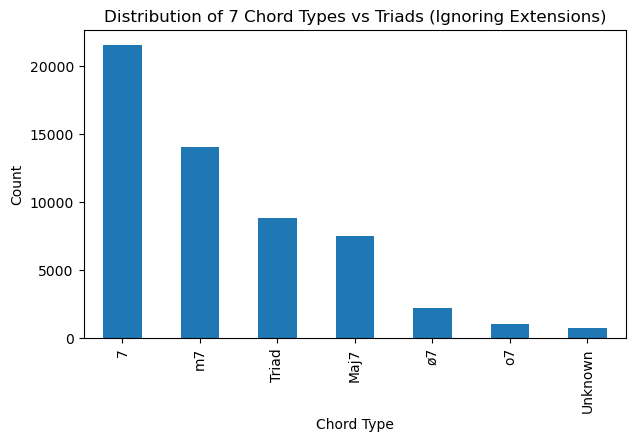

In [20]:
# Visualize with a bar plot
plt.figure(figsize=(7,4))
df["Chord Type"].value_counts().plot(kind="bar")
plt.title("Distribution of 7 Chord Types vs Triads (Ignoring Extensions)")
plt.xlabel("Chord Type")
plt.ylabel("Count")
plt.show()

In [21]:
# Dominant 7s take the cake, as they are used in ii–V–I progressions and as secondary dominants, tritone subs, and passing chords.
# Minor 7s come next, mostly serving as the ii chord in ii–V–I sequences or as iv and vi chords in minor keys.  

# Now we will add a column for chord extensions
def classify_chord_extension(chord):
    """
    Classifies chords by their extensions:
    - 6, 9, 11, 13
    - 'No extension' if it's a triad or 7 chord
    """
    if pd.isna(chord):
        return "Unknown"
    
    chord = chord.lower().replace(" ", "")
    
    # Look for extensions in order
    if "13" in chord:
        return "13"
    elif "11" in chord:
        return "11"
    elif "9" in chord:
        return "9"
    elif "6" in chord:
        return "6"
    else:
        return "No extension"

df["Chord Extension"] = df["Chord_clean"].apply(classify_chord_extension)

df["Chord Extension"].value_counts()

Chord Extension
No extension    44926
9                4045
6                4012
11               1417
13                872
Unknown           753
Name: count, dtype: int64

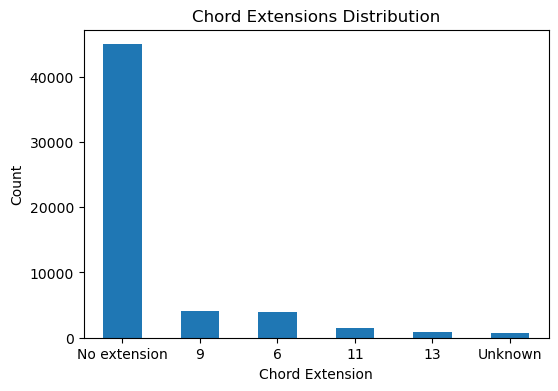

In [22]:
# Let's see chord extensions as a bar chart
plt.figure(figsize=(6,4))
df["Chord Extension"].value_counts().plot(kind="bar")
plt.title("Chord Extensions Distribution")
plt.xlabel("Chord Extension")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [23]:
# The vast majority of chords in our dataset have no extensions.  
# Of course, this does not mean that jazz players won't add extensions for color during live performances.  
# Not surprisingly, 9ths and 6ths are the two most common extensions.

In [24]:
# Let's add columns to track root motion
df = df.sort_values(["Title", "Section", "Measure", "Chord Index"])

df["Next Root_pc"] = df.groupby("Title")["Root_pc"].shift(-1)

df["Root Motion"] = (df["Next Root_pc"] - df["Root_pc"]) % 12

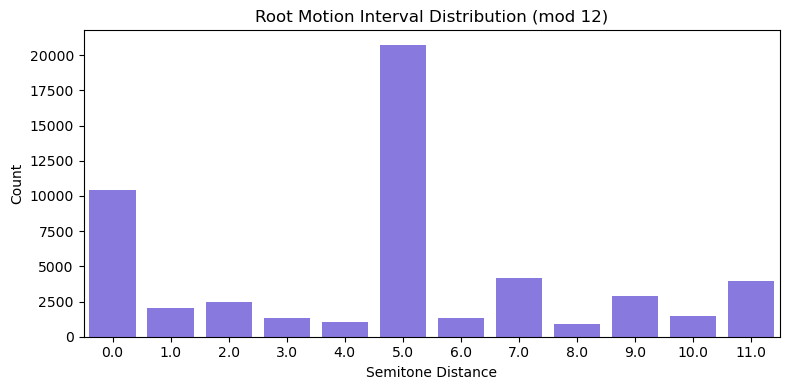

In [25]:
# We can visualize our semitone distances with a bar chart
motion_counts = df["Root Motion"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=motion_counts.index, y=motion_counts.values, color="mediumslateblue")
plt.title("Root Motion Interval Distribution (mod 12)")
plt.xlabel("Semitone Distance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [26]:
# This is very interesting. We can now see that a huge proportion of chord changes involve the root moving up 5 halfsteps.
# 5 half steps is the equivalent of moving up a fourth (or down a fifth). This movement is the signature 2-5-1 we see so often in jazz
# It is also common for the chord not to change (not surprising)
# Let's see what percentage of all root movement is motion by fourths.

In [27]:
total_motions = df["Root Motion"].dropna().shape[0]

up_fourth_count = (df["Root Motion"] == 5).sum()

percent_up_fourth = (up_fourth_count / total_motions) * 100

print(f"Percentage of root motions that are up a perfect fourth: {percent_up_fourth:.2f}%")

Percentage of root motions that are up a perfect fourth: 39.29%


In [28]:
# Almost 40%! That's a lot

In [29]:
# We now have a much larger dataframe of chord features and song features. Let's take a peak at what it has turned into
df.head()

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year,Roman Numeral,Root,Root_pc,Chord_clean,Chord Type,Chord Extension,Next Root_pc,Root Motion
37,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,0,Fmaj7,1947,I7,F,5.0,Fmaj7,Maj7,No extension,8.0,3.0
38,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,1,Ab7,1947,III75#3,Ab,8.0,Ab7,7,No extension,5.0,9.0
53,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,16,Fmaj7,1947,I7,F,5.0,Fmaj7,Maj7,No extension,8.0,3.0
54,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,17,Ab7,1947,III75#3,Ab,8.0,Ab7,7,No extension,5.0,9.0
80,26-2,John Coltrane,F,Medium Up Swing,4/4,A,0,43,Fmaj7,1947,I7,F,5.0,Fmaj7,Maj7,No extension,8.0,3.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56025 entries, 37 to 56016
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            56025 non-null  object 
 1   Composer         56025 non-null  object 
 2   Key              46064 non-null  object 
 3   Rhythm           56025 non-null  object 
 4   Time Signature   55501 non-null  object 
 5   Section          50097 non-null  object 
 6   Measure          56025 non-null  int64  
 7   Chord Index      56025 non-null  int64  
 8   Chord            55272 non-null  object 
 9   Year             56025 non-null  object 
 10  Roman Numeral    30838 non-null  object 
 11  Root             55272 non-null  object 
 12  Root_pc          55040 non-null  float64
 13  Chord_clean      55272 non-null  object 
 14  Chord Type       56025 non-null  object 
 15  Chord Extension  56025 non-null  object 
 16  Next Root_pc     53659 non-null  float64
 17  Root Motion     

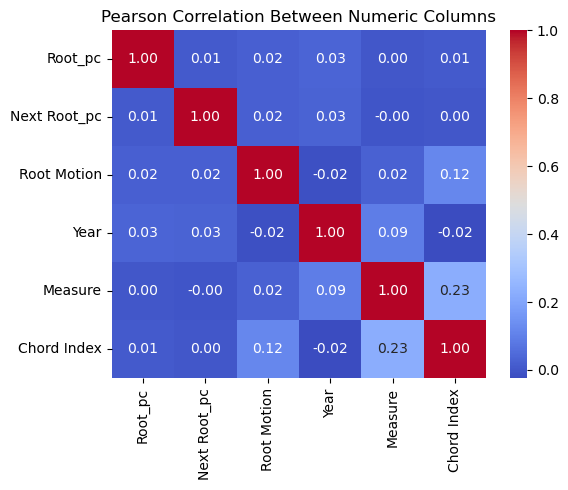

In [31]:
# Let's explore some new feature relationships
# We will start by computing pearson correlation between numeric columns
numeric_cols = ["Root_pc", "Next Root_pc", "Root Motion", "Year", "Measure", "Chord Index"]

# Convert numeric columns to float and drop NaN
numeric_df = df[numeric_cols].apply(pd.to_numeric, errors="coerce").dropna()

# Compute Pearson correlation
corr_matrix = numeric_df.corr(method="pearson")

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()

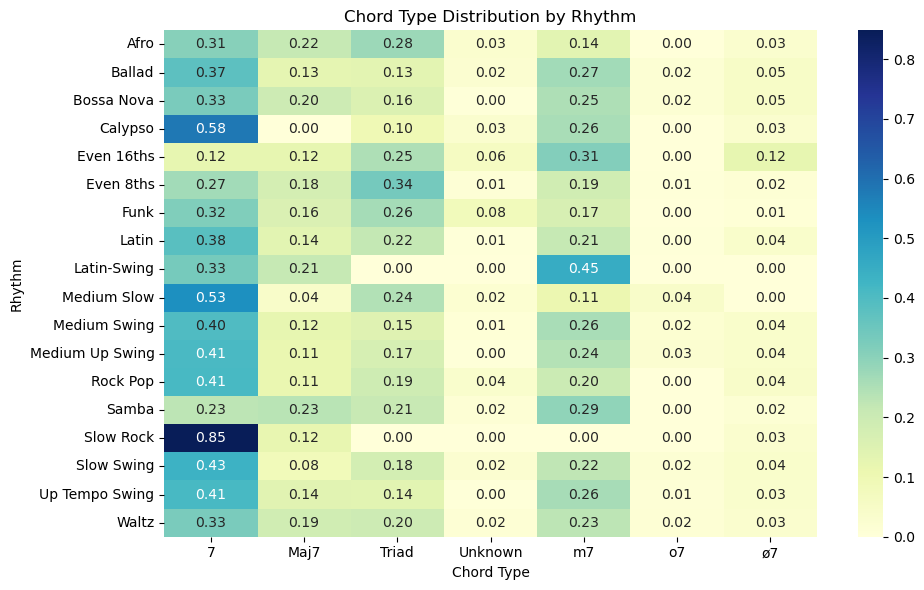

In [32]:
# This doesn't tell us much, as the numeric columns aren't very related. 
# This motivates a closer look at categorical features, where stronger patterns may appear.

# Let's see chord type compared to rhythm
rhythm_ct = pd.crosstab(
    df["Rhythm"],
    df["Chord Type"],
    normalize="index"
)

plt.figure(figsize=(10,6))
sns.heatmap(
    rhythm_ct,
    cmap="YlGnBu",
    annot=True,
    fmt=".2f"
)

plt.title("Chord Type Distribution by Rhythm")
plt.xlabel("Chord Type")
plt.ylabel("Rhythm")
plt.tight_layout()
plt.show()

In [33]:
# We can see dominant 7 chords are popular in almost every genre, and especially in slow rock 
# m7 are used particularly often in latin-swing

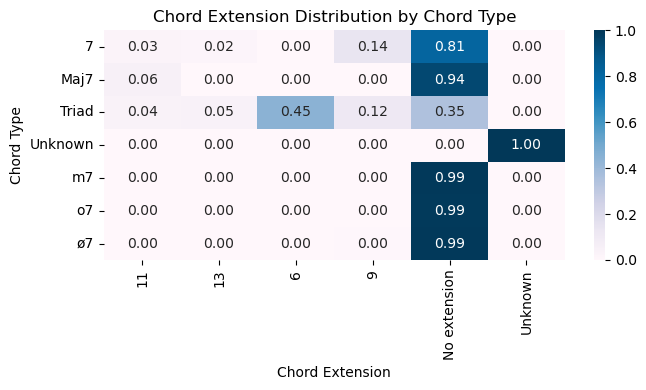

In [34]:
# Let's see chord extension by chord type
ext_ct = pd.crosstab(
    df["Chord Type"],
    df["Chord Extension"],
    normalize="index"
)

plt.figure(figsize=(7,4))
sns.heatmap(ext_ct, cmap="PuBu", annot=True, fmt=".2f")
plt.title("Chord Extension Distribution by Chord Type")
plt.xlabel("Chord Extension")
plt.ylabel("Chord Type")
plt.tight_layout()
plt.show()

In [35]:
# We find that the chord types most likely to include extensions are triads and dominant 7 chords.
# Diminished chords rarely contain extensions at all.
# As noted earlier, this dataset contains relatively few extensions overall, even though jazz players almost always add extensions in performance for additional color.

In [36]:
# That wraps up our exploratory data analysis!

In [43]:
df_songs = df_songs_clean

In [45]:
df_songs.to_csv('../data/df_jazz_songs.csv', index=False)

In [47]:
df_chords.to_csv('../data/df_jazz_chords.csv', index=False)

In [49]:
df_songs.head()

,Title,Composer,Rhythm,TimeSignature,Key,Year
0,9.20 Special,Earl Warren,Medium Swing,4/4,NaN,1941
1,26-2,John Coltrane,Medium Up Swing,4/4,F,1947
2,52nd Street Theme,Thelonious Monk,Up Tempo Swing,4/4,NaN,1947
3,500 Miles High,Chick Corea,Bossa Nova,4/4,Emin,1972
4,502 Blues,Jimmy Rowles,Waltz,3/4,Amin,1959


In [48]:
df_chords.head()

,Title,Composer,Key,Rhythm,Time Signature,Section,Measure,Chord Index,Chord,Year,Roman Numeral,Root,Root_pc,Chord_clean,Chord Type,Chord Extension
0,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,0,0,D9,1941,NaN,D,2.0,D9,Triad,9
1,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,1,1,Fm6,1941,NaN,F,5.0,Fm6,Triad,6
2,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,2,2,D9,1941,NaN,D,2.0,D9,Triad,9
3,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,3,3,Fm6,1941,NaN,F,5.0,Fm6,Triad,6
4,9.20 Special,Earl Warren,NaN,Medium Swing,4/4,A,4,4,C,1941,NaN,C,0.0,C,Triad,No extension
